# Contextualization

Dan Cersosimo | Data Scientist | Random Forest Regression

This Yelp dataset encompasses a variety of features that detail many components pertaining to a myriad of businesses. As a result, there are a multitude of routes that could be taken when considering a Data Science Problem that could be proposed and subsequently solved. After pondering these potential options, I have decided to employ Random Forest Regression to determine which attributes are most impactful to the review stars of restaurants that are open and have over 100 reviews. I chose restaurants as after some preliminary exploration, noticed they are the most abundant business category. In addition, I opt for businesses that are open so that it guarantees the data used comes from businesses which are still successfully operating and have over 100 reviews to ensure the rating is a consensus of a sizeable portion of individuals. I will preprocess the data to ensure the proper format for the Random Forest regression and subsequently train/test said model. This model will be employed to depict the impact each attribute has on the stars of the restaurant while being harnessed to build a user-interactive tool. This tool will take up user input for the attributes of a hypothetical restaurant and predict its stars accordingly. In addition, I will build a geospatial map using Folium to visualize the names and stars of each business at their respective coordinates while also visualizing the prospective restaurant from the tool by taking in user coordinates. This problem is useful as it provides insight into the impact of supplemental traits on well-visited and open restaurants. The information portrayed could be quite useful for prospective restaurant owners who are in the midst of assessing which components to include in their restaurants. The tool would allow for individuals to evaluate how specifically entered attributes for their potential restaurant could collectively result in projected stars. Overall, this Data Science problem is rather interesting as it takes on a rather specific task in the context of this expansive Yelp data while offering string insights and functional tools for anyone interested in gauging how a restaurant's characteristics can impact their ratings. 


# Data Aquisition 

In [2]:
#Import intial libraires which I will use. Others will be imported along the process
import pandas as pd
import json



In [3]:
#This loads in the Yelp dataset
df_business = pd.read_json("yelp_academic_dataset_business.json", lines = True)

In [4]:
#This show the business df
df_business

business_id                             name  \
0       Apn5Q_b6Nz61Tq4XzPdf9A             Minhas Micro Brewery   
1       AjEbIBw6ZFfln7ePHha9PA              CK'S BBQ & Catering   
2       O8S5hYJ1SMc8fA4QBtVujA                    La Bastringue   
3       bFzdJJ3wp3PZssNEsyU23g                  Geico Insurance   
4       8USyCYqpScwiNEb58Bt6CA                    Action Engine   
...                        ...                              ...   
188588  sMQAZ3DkfrURFoJAyOhjEw                     Ross Massage   
188589  6hvuCibNS4uECetHb9MCQQ            Four Seasons Boutique   
188590  KleCXFYOmdACcQUvf6_XEg              Walmart Supercenter   
188591  3_fIsSxN2RBovQ_6EFtLzA  Residence Inn Charlotte Concord   
188592  NkOvIueadjFUxeCyq_uQEw     Tito Jimy Salon and Boutique   

                     neighborhood                    address        city  \
0                                          1314 44 Avenue NE     Calgary   
1                                                              Henderson   
2       Rosemont-La Petite-Patrie        1335 rue Beaubien E    Montréal   
3                                            211 W Monroe St     Phoenix   
4                                        2005 Alyth Place SE     Calgary   
...                           ...                        ...         ...   
188588                             8000 McKnight Rd, Ste 570  Pittsburgh   
188589                                     3341 Babcock Blvd  Pittsburgh   
188590                                       5825 Thunder Rd     Concord   
188591                               7601 Scott Padgett Pkwy     Concord   
188592                   Eastside    3900 Paradise Rd, Ste R   Las Vegas   

       state postal_code   latitude   longitude  stars  review_count  is_open  \
0         AB     T2E 6L6  51.091813 -114.031675    4.0            24        1   
1         NV       89002  35.960734 -114.939821    4.5             3        0   
2         QC     H2G 1K7  45.540503  -73.599300    4.0             5        0   
3         AZ       85003  33.449999 -112.076979    1.5             8        1   
4         AB     T2H 0N5  51.035591 -114.027366    2.0             4        1   
...      ...         ...        ...         ...    ...           ...      ...   
188588    PA       15237  40.551152  -80.021213    2.5             9        0   
188589    PA       15237  40.534242  -80.019556    2.0             5        1   
188590    NC       28027  35.378669  -80.724733    3.0            26        1   
188591    NC       28027  35.364366  -80.703454    4.0            19        1   
188592    NV       89169  36.118697 -115.154269    4.0             8        1   

                                               attributes  \
0       {'BikeParking': 'False', 'BusinessAcceptsCredi...   
1       {'Alcohol': 'none', 'BikeParking': 'False', 'B...   
2       {'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...   
3                                                    None   
4                  {'BusinessAcceptsCreditCards': 'True'}   
...                                                   ...   
188588  {'AcceptsInsurance': 'False', 'BusinessAccepts...   
188589                                               None   
188590  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
188591  {'BusinessAcceptsCreditCards': 'True', 'DogsAl...   
188592  {'BikeParking': 'True', 'BusinessAcceptsCredit...   

                                               categories  \
0       Tours, Breweries, Pizza, Restaurants, Food, Ho...   
1       Chicken Wings, Burgers, Caterers, Street Vendo...   
2       Breakfast & Brunch, Restaurants, French, Sandw...   
3                           Insurance, Financial Services   
4       Home & Garden, Nurseries & Gardening, Shopping...   
...                                                   ...   
188588        Skin Care, Beauty & Spas, Day Spas, Massage   
188589  Fashion, Women's Clothing, Accessories, Bridal...   
188590  Mobile Phones, Shopping, Department St

# Data Preprocessing and Intital EDA

At this point, I wanted to briefly explore the df to determine the Data Science problem to solve. As a result, I assessed the df and upon initially viewing it, was intrigued by the nature of the attributes column and sought to delve into its structure and content. This occurs in the following code blocks.

In [5]:
#This shows just one entry to see the breakdown of the attributes column
for i in df_business['attributes']:
    for index in i:
        print(index)
        print(i[index])
        print("")
    break

BikeParking
False

BusinessAcceptsCreditCards
True

BusinessParking
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}

GoodForKids
True

HasTV
True

NoiseLevel
average

OutdoorSeating
False

RestaurantsAttire
casual

RestaurantsDelivery
False

RestaurantsGoodForGroups
True

RestaurantsPriceRange2
2

RestaurantsReservations
True

RestaurantsTakeOut
True



In [6]:
#here I detail the specific groups of attributes within the overall column
count = 0
attributes = []
for i in df_business['attributes']:
    if i == None:
        continue
    for index in i:
        if index not in attributes:
            attributes.append(index)
        else:
            continue
print(attributes)

['BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking', 'GoodForKids', 'HasTV', 'NoiseLevel', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTakeOut', 'Alcohol', 'Caters', 'DogsAllowed', 'DriveThru', 'GoodForMeal', 'RestaurantsTableService', 'WheelchairAccessible', 'WiFi', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights', 'CoatCheck', 'Corkage', 'GoodForDancing', 'HappyHour', 'Music', 'Smoking', 'ByAppointmentOnly', 'AcceptsInsurance', 'BusinessAcceptsBitcoin', 'HairSpecializesIn', 'AgesAllowed', 'RestaurantsCounterService', 'Open24Hours', 'DietaryRestrictions']


In [7]:
#This code depicts the number of businesses where each specific attribute is present in
count = 0
attributes_dict = {}
for i in df_business['attributes']:
    if i == None:
        continue
    for index in i:
        if index not in attributes_dict.keys():
            attributes_dict[index] = 1
        elif index in attributes_dict.keys():
            attributes_dict[index] += 1
        else:
            continue
print(attributes_dict)

{'BikeParking': 84891, 'BusinessAcceptsCreditCards': 140391, 'BusinessParking': 103424, 'GoodForKids': 64931, 'HasTV': 47533, 'NoiseLevel': 43710, 'OutdoorSeating': 54181, 'RestaurantsAttire': 48182, 'RestaurantsDelivery': 51668, 'RestaurantsGoodForGroups': 53839, 'RestaurantsPriceRange2': 107120, 'RestaurantsReservations': 51363, 'RestaurantsTakeOut': 61206, 'Alcohol': 47892, 'Caters': 40038, 'DogsAllowed': 13681, 'DriveThru': 6754, 'GoodForMeal': 47483, 'RestaurantsTableService': 43325, 'WheelchairAccessible': 52023, 'WiFi': 49026, 'Ambience': 47577, 'BYOB': 911, 'BYOBCorkage': 1409, 'BestNights': 6844, 'CoatCheck': 8531, 'Corkage': 657, 'GoodForDancing': 9162, 'HappyHour': 9285, 'Music': 8807, 'Smoking': 8113, 'ByAppointmentOnly': 45423, 'AcceptsInsurance': 11671, 'BusinessAcceptsBitcoin': 12674, 'HairSpecializesIn': 1881, 'AgesAllowed': 397, 'RestaurantsCounterService': 397, 'Open24Hours': 352, 'DietaryRestrictions': 138}


In [8]:
#This code depicts the number of businesses each category is present in
cats = df_business['categories']
business = df_business['business_id']
b_name = df_business['name']
count = 0
categories_dict = {}
c = []
for i, index, name in zip(cats, business, b_name):
    if i == None:
        continue
    i = i.strip()
    Vals = i.split(",")
    for category in Vals:
        c.append(category)
v = []
for i in c:
    x = i.strip()
    v.append(x)
df_c = pd.DataFrame(v)
        
    
df_c[0].value_counts().head(25)

    

Restaurants                  57173
Shopping                     30231
Food                         27118
Beauty & Spas                18967
Home Services                18634
Health & Medical             16157
Local Services               12906
Automotive                   12656
Nightlife                    12438
Bars                         10853
Event Planning & Services     9774
Active Life                   9119
Fashion                       7406
Coffee & Tea                  6936
Sandwiches                    6912
Hair Salons                   6825
Fast Food                     6812
American (Traditional)        6659
Pizza                         6603
Home & Garden                 6020
Auto Repair                   5877
Hotels & Travel               5808
Arts & Entertainment          5794
Professional Services         5620
Doctors                       5450
Name: 0, dtype: int64

Handle attributes column by converting the json format to a df.

In [9]:
#Utilize json normalize to create a df from the json stored attributes 
attributes = df_business['attributes']
df_attributes = pd.json_normalize(attributes)
df_attributes.head()


BikeParking BusinessAcceptsCreditCards  \
0       False                       True   
1       False                       True   
2        True                      False   
3         NaN                        NaN   
4         NaN                       True   

                                     BusinessParking GoodForKids  HasTV  \
0  {'garage': False, 'street': True, 'validated':...        True   True   
1  {'garage': False, 'street': True, 'validated':...        True  False   
2  {'garage': False, 'street': False, 'validated'...        True   True   
3                                                NaN         NaN    NaN   
4                                                NaN         NaN    NaN   

  NoiseLevel OutdoorSeating RestaurantsAttire RestaurantsDelivery  \
0    average          False            casual               False   
1        NaN           True            casual               False   
2    average          False            casual               False   
3        NaN            NaN               NaN                 NaN   
4        NaN            NaN               NaN                 NaN   

  RestaurantsGoodForGroups  ... Music Smoking ByAppointmentOnly  \
0                     True  ...   NaN     NaN               NaN   
1                     True  ...   NaN     NaN               NaN   
2                     True  ...   NaN     NaN               NaN   
3                      NaN  ...   NaN     NaN               NaN   
4                      NaN  ...   NaN     NaN               NaN   

  AcceptsInsurance BusinessAcceptsBitcoin HairSpecializesIn AgesAllowed  \
0              NaN                    NaN               NaN         NaN   
1              NaN                    NaN               NaN         NaN   
2              NaN                    NaN               NaN         NaN   
3              NaN                    NaN               NaN         NaN   
4              NaN                    NaN               NaN         NaN   

  RestaurantsCounterService Open24Hours DietaryRestrictions  
0                       NaN         NaN                 NaN  
1                       NaN         NaN                 NaN  
2                       NaN         NaN                 NaN  
3                       NaN         NaN                 NaN  
4                       NaN         NaN                 NaN  

[5 rows x 39 columns]

Handle columns whose values are arranged in a dictionary format. BusinessParking, GoodForMeal, and Ambience appear to be those which are have this format and are relevant to the restarants. This is upon first assessment and once the df is arranged I will evaluate further to unveil any additional features which are relevant and may require a similar adjustment 

In [10]:
import numpy as np

#This iterates though each value for business parking and breaks up the string into distinct lists with the values in each
parking = df_attributes['BusinessParking']
options = ['garage', 'street', 'validated', 'lot', 'valet']
comp = []
g_list = []
s_list = []
vali_list = []
lot_list = []
valet_list = []
for i in parking:
    comp = []
    if pd.isna(i) == True:
        g_list.append(np.nan)
        s_list.append(np.nan)
        vali_list.append(np.nan)
        lot_list.append(np.nan)
        valet_list.append(np.nan)
        continue
    x = i.replace(" ", "")
    x = x.replace("{", "")
    x = x.replace("}", "")
    x = x.replace("'", "")
    split = x.split(",")
    for i in split:
        sep = i.split(":")
        trait = sep[0]
        value = sep[1] 
        comp.append(trait)
        if trait == 'garage':
            g_list.append(value)
        if trait == 'street':
            s_list.append(value)
        if trait == 'validated':
            vali_list.append(value)
        if trait == 'lot':
            lot_list.append(value)
        if trait == 'valet':
            valet_list.append(value)
    diff = list(set(options) - set(comp))
    for i in diff:
        if i == 'garage':
            g_list.append(np.nan)
        if i == 'street':
            s_list.append(np.nan)
        if i == 'validated':
            vali_list.append(np.nan)
        if i == 'lot':
            lot_list.append(np.nan)
        if i == 'valet':
            valet_list.append(np.nan)



In [11]:
#This takes the lists above and builds a df 
parking_data = {'parking_garage' : g_list, 'parking_street' : s_list, 'parking_validated' : vali_list, 'parking_lot' : lot_list, 'parking_valet' : valet_list}
df_parking = pd.DataFrame(parking_data)
df_parking.head()

parking_garage parking_street parking_validated parking_lot parking_valet
0          False           True             False       False         False
1          False           True             False        True         False
2          False          False             False       False         False
3            NaN            NaN               NaN         NaN           NaN
4            NaN            NaN               NaN         NaN           NaN

In [12]:
#Drops the no longer needed column
df_attributes.drop(columns=['BusinessParking'], inplace = True)

In [13]:
#Effectivley adds the parking df to the attributes df
df_att_clean = pd.concat([df_attributes, df_parking], axis=1)

In [14]:
df_att_clean

BikeParking BusinessAcceptsCreditCards GoodForKids  HasTV NoiseLevel  \
0            False                       True        True   True    average   
1            False                       True        True  False        NaN   
2             True                      False        True   True    average   
3              NaN                        NaN         NaN    NaN        NaN   
4              NaN                       True         NaN    NaN        NaN   
...            ...                        ...         ...    ...        ...   
188588         NaN                       True         NaN    NaN        NaN   
188589         NaN                        NaN         NaN    NaN        NaN   
188590        True                       True         NaN    NaN        NaN   
188591         NaN                       True         NaN    NaN        NaN   
188592        True                       True        True    NaN        NaN   

       OutdoorSeating RestaurantsAttire RestaurantsDelivery  \
0               False            casual               False   
1                True            casual               False   
2               False            casual               False   
3                 NaN               NaN                 NaN   
4                 NaN               NaN                 NaN   
...               ...               ...                 ...   
188588            NaN               NaN                 NaN   
188589            NaN               NaN                 NaN   
188590            NaN               NaN                 NaN   
188591            NaN               NaN                 NaN   
188592            NaN               NaN                 NaN   

       RestaurantsGoodForGroups RestaurantsPriceRange2  ...  \
0                          True                      2  ...   
1                          True                      2  ...   
2                          True                      2  ...   
3                           NaN                    NaN  ...   
4                           NaN                    NaN  ...   
...                         ...                    ...  ...   
188588                      NaN                      1  ...   
188589                      NaN                    NaN  ...   
188590                      NaN                      1  ...   
188591                      NaN                      2  ...   
188592                      NaN                      2  ...   

                                        HairSpecializesIn AgesAllowed  \
0                                                     NaN         NaN   
1                                                     NaN         NaN   
2                                                     NaN         NaN   
3                                                     NaN         NaN   
4                                                     NaN         NaN   
...                                                   ...         ...   
188588                                                NaN         NaN   
188589                                                NaN         NaN   
188590                                                NaN         NaN   
188591                                                NaN         NaN   
188592  {'coloring': True, 'africanamerican': True, 'c...         NaN   

       RestaurantsCounterService Open24Hours DietaryRestrictions  \
0                            NaN         NaN                 NaN   
1                            NaN         NaN                 NaN   
2                            NaN         NaN                 NaN   
3                            NaN         NaN                 NaN   
4                            NaN         NaN                 NaN   
...                          ...         ...                 ...   
188588                       NaN         NaN                 NaN   
188589                       NaN         NaN                 NaN   
188590                       NaN         NaN           

In [15]:
#This breaks up the string values for GoodForMeal and creates a df with seperate features for each unique value, similar to above

vals_b = df_att_clean['GoodForMeal']
options = ['dessert', 'latenight', 'lunch', 'dinner', 'breakfast', 'brunch']
comp = []
dessert_list = []
ln_list = []
lunch_list = []
dinner_list = []
break_list = []
brunch_list = []
for i in vals_b:
    comp = []
    if pd.isna(i) == True:
        dessert_list.append(np.nan)
        ln_list.append(np.nan)
        lunch_list.append(np.nan)
        dinner_list.append(np.nan)
        break_list.append(np.nan)
        brunch_list.append(np.nan)
        continue
    x = i.replace(" ", "")
    x = x.replace("{", "")
    x = x.replace("}", "")
    x = x.replace("'", "")
    split = x.split(",")
    for i in split:
        sep = i.split(":")
        trait = sep[0]
        value = sep[1] 
        comp.append(trait)
        if trait == 'dessert':
            dessert_list.append(value)
        if trait == 'latenight':
            ln_list.append(value)
        if trait == 'lunch':
            lunch_list.append(value)
        if trait == 'dinner':
            dinner_list.append(value)
        if trait == 'breakfast':
            break_list.append(value)
        if trait == 'brunch':
            brunch_list.append(value)
    diff = list(set(options) - set(comp))
    for i in diff:
        if i == 'dessert':
            dessert_list.append(np.nan)
        if i == 'latenight':
            ln_list.append(np.nan)
        if i == 'lunch':
            lunch_list.append(np.nan)
        if i == 'dinner':
            dinner_list.append(np.nan)
        if i == 'breakfast':
            break_list.append(np.nan)
        if i == 'brunch':
            brunch_list.append(np.nan)


meal_data = {'Dessert' : dessert_list, 'Late_Night' : ln_list, 'Lunch' : lunch_list, 'Dinner' : dinner_list, 'Breakfast' : break_list, 'Brunch' : brunch_list}
df_meal = pd.DataFrame(meal_data)
df_meal

Dessert Late_Night  Lunch Dinner Breakfast Brunch
0          NaN        NaN    NaN    NaN       NaN    NaN
1        False      False  False  False     False  False
2        False      False  False  False     False  False
3          NaN        NaN    NaN    NaN       NaN    NaN
4          NaN        NaN    NaN    NaN       NaN    NaN
...        ...        ...    ...    ...       ...    ...
188588     NaN        NaN    NaN    NaN       NaN    NaN
188589     NaN        NaN    NaN    NaN       NaN    NaN
188590     NaN        NaN    NaN    NaN       NaN    NaN
188591     NaN        NaN    NaN    NaN       NaN    NaN
188592     NaN        NaN    NaN    NaN       NaN    NaN

[188593 rows x 6 columns]

In [16]:
#Similar to above but for the Ambience feature. This has more dimensions
vals_a = df_att_clean['Ambience']
options = ['romantic', 'intimate', 'classy', 'hipster', 'divey', 'touristy', 'trendy', 'upscale', 'casual']
comp = []
r_list = []
i_list = []
cl_list = []
h_list = []
d_list = []
to_list = []
tr_list = []
u_list = []
ca_list =[]
for i in vals_a:
    comp = []
    if pd.isna(i) == True:
        r_list.append(np.nan)
        i_list.append(np.nan)
        cl_list.append(np.nan)
        h_list.append(np.nan)
        d_list.append(np.nan)
        to_list.append(np.nan)
        tr_list.append(np.nan)
        u_list.append(np.nan)
        ca_list.append(np.nan)
        continue
    x = i.replace(" ", "")
    x = x.replace("{", "")
    x = x.replace("}", "")
    x = x.replace("'", "")
    split = x.split(",")
    for i in split:
        sep = i.split(":")
        trait = sep[0]
        value = sep[1] 
        comp.append(trait)
        if trait == 'romantic':
            r_list.append(value)
        if trait == 'intimate':
            i_list.append(value)
        if trait == 'classy':
            cl_list.append(value)
        if trait == 'hipster':
            h_list.append(value)
        if trait == 'divey':
            d_list.append(value)
        if trait == 'touristy':
            to_list.append(value)
        if trait == 'trendy':
            tr_list.append(value)
        if trait == 'upscale':
            u_list.append(value)
        if trait == 'casual':
            ca_list.append(value)
    diff = list(set(options) - set(comp))
    for i in diff:
        if i == 'romantic':
            r_list.append(np.nan)
        if i == 'intimate':
            i_list.append(np.nan)
        if i == 'classy':
            cl_list.append(np.nan)
        if i == 'hipster':
            h_list.append(np.nan)
        if i == 'divey':
            d_list.append(np.nan)
        if i == 'touristy':
            to_list.append(np.nan)
        if i == 'trendy':
            tr_list.append(np.nan)
        if i == 'upscale':
            u_list.append(np.nan)
        if i == 'casual':
            ca_list.append(np.nan)


Ambience_data = {'Romantic' : r_list, 'Intimate' : i_list, 'Classy' : cl_list, 'Hipster' : h_list, 'Divey' : d_list, 'Touristy' : to_list,
            'Trendy' : tr_list, 'Upscale' : u_list, 'Casual' : ca_list}
df_ambience = pd.DataFrame(Ambience_data)
df_ambience

Romantic Intimate Classy Hipster Divey Touristy Trendy Upscale Casual
0           NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
1           NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
2         False    False  False   False   NaN    False  False   False  False
3           NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
4           NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
...         ...      ...    ...     ...   ...      ...    ...     ...    ...
188588      NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
188589      NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
188590      NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
188591      NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN
188592      NaN      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN

[188593 rows x 9 columns]

Here I will begin the process of developing a consolidated dataset that fits the context of this project by removing unecessary features and concating the dfs together from all the features which have been adequatly formatted

In [17]:
df_clean = df_business

df_clean.drop(columns=['attributes'], inplace=True)
df_clean

business_id                             name  \
0       Apn5Q_b6Nz61Tq4XzPdf9A             Minhas Micro Brewery   
1       AjEbIBw6ZFfln7ePHha9PA              CK'S BBQ & Catering   
2       O8S5hYJ1SMc8fA4QBtVujA                    La Bastringue   
3       bFzdJJ3wp3PZssNEsyU23g                  Geico Insurance   
4       8USyCYqpScwiNEb58Bt6CA                    Action Engine   
...                        ...                              ...   
188588  sMQAZ3DkfrURFoJAyOhjEw                     Ross Massage   
188589  6hvuCibNS4uECetHb9MCQQ            Four Seasons Boutique   
188590  KleCXFYOmdACcQUvf6_XEg              Walmart Supercenter   
188591  3_fIsSxN2RBovQ_6EFtLzA  Residence Inn Charlotte Concord   
188592  NkOvIueadjFUxeCyq_uQEw     Tito Jimy Salon and Boutique   

                     neighborhood                    address        city  \
0                                          1314 44 Avenue NE     Calgary   
1                                                              Henderson   
2       Rosemont-La Petite-Patrie        1335 rue Beaubien E    Montréal   
3                                            211 W Monroe St     Phoenix   
4                                        2005 Alyth Place SE     Calgary   
...                           ...                        ...         ...   
188588                             8000 McKnight Rd, Ste 570  Pittsburgh   
188589                                     3341 Babcock Blvd  Pittsburgh   
188590                                       5825 Thunder Rd     Concord   
188591                               7601 Scott Padgett Pkwy     Concord   
188592                   Eastside    3900 Paradise Rd, Ste R   Las Vegas   

       state postal_code   latitude   longitude  stars  review_count  is_open  \
0         AB     T2E 6L6  51.091813 -114.031675    4.0            24        1   
1         NV       89002  35.960734 -114.939821    4.5             3        0   
2         QC     H2G 1K7  45.540503  -73.599300    4.0             5        0   
3         AZ       85003  33.449999 -112.076979    1.5             8        1   
4         AB     T2H 0N5  51.035591 -114.027366    2.0             4        1   
...      ...         ...        ...         ...    ...           ...      ...   
188588    PA       15237  40.551152  -80.021213    2.5             9        0   
188589    PA       15237  40.534242  -80.019556    2.0             5        1   
188590    NC       28027  35.378669  -80.724733    3.0            26        1   
188591    NC       28027  35.364366  -80.703454    4.0            19        1   
188592    NV       89169  36.118697 -115.154269    4.0             8        1   

                                               categories  \
0       Tours, Breweries, Pizza, Restaurants, Food, Ho...   
1       Chicken Wings, Burgers, Caterers, Street Vendo...   
2       Breakfast & Brunch, Restaurants, French, Sandw...   
3                           Insurance, Financial Services   
4       Home & Garden, Nurseries & Gardening, Shopping...   
...                                                   ...   
188588        Skin Care, Beauty & Spas, Day Spas, Massage   
188589  Fashion, Women's Clothing, Accessories, Bridal...   
188590  Mobile Phones, Shopping, Department Stores, Fo...   
188591  Event Planning & Services, Hotels & Travel, Ho...   
188592  Makeup Artists, Men's Clothing, Swimwear, Shop...   

                                                    hours  
0       {'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...  
1       {'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...  
2       {'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...  
3                                                    None  
4       {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  
...                                                   ...  
188588  {'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...  
188589                                               None  
188590  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W.

In [18]:
#Consolidate all the features from the previous dfs into one cleaned df
df_clean = pd.concat([df_clean, df_att_clean, df_meal, df_ambience], axis = 1)

In [19]:
df_clean

business_id                             name  \
0       Apn5Q_b6Nz61Tq4XzPdf9A             Minhas Micro Brewery   
1       AjEbIBw6ZFfln7ePHha9PA              CK'S BBQ & Catering   
2       O8S5hYJ1SMc8fA4QBtVujA                    La Bastringue   
3       bFzdJJ3wp3PZssNEsyU23g                  Geico Insurance   
4       8USyCYqpScwiNEb58Bt6CA                    Action Engine   
...                        ...                              ...   
188588  sMQAZ3DkfrURFoJAyOhjEw                     Ross Massage   
188589  6hvuCibNS4uECetHb9MCQQ            Four Seasons Boutique   
188590  KleCXFYOmdACcQUvf6_XEg              Walmart Supercenter   
188591  3_fIsSxN2RBovQ_6EFtLzA  Residence Inn Charlotte Concord   
188592  NkOvIueadjFUxeCyq_uQEw     Tito Jimy Salon and Boutique   

                     neighborhood                    address        city  \
0                                          1314 44 Avenue NE     Calgary   
1                                                              Henderson   
2       Rosemont-La Petite-Patrie        1335 rue Beaubien E    Montréal   
3                                            211 W Monroe St     Phoenix   
4                                        2005 Alyth Place SE     Calgary   
...                           ...                        ...         ...   
188588                             8000 McKnight Rd, Ste 570  Pittsburgh   
188589                                     3341 Babcock Blvd  Pittsburgh   
188590                                       5825 Thunder Rd     Concord   
188591                               7601 Scott Padgett Pkwy     Concord   
188592                   Eastside    3900 Paradise Rd, Ste R   Las Vegas   

       state postal_code   latitude   longitude  stars  ...  Brunch  Romantic  \
0         AB     T2E 6L6  51.091813 -114.031675    4.0  ...     NaN       NaN   
1         NV       89002  35.960734 -114.939821    4.5  ...   False       NaN   
2         QC     H2G 1K7  45.540503  -73.599300    4.0  ...   False     False   
3         AZ       85003  33.449999 -112.076979    1.5  ...     NaN       NaN   
4         AB     T2H 0N5  51.035591 -114.027366    2.0  ...     NaN       NaN   
...      ...         ...        ...         ...    ...  ...     ...       ...   
188588    PA       15237  40.551152  -80.021213    2.5  ...     NaN       NaN   
188589    PA       15237  40.534242  -80.019556    2.0  ...     NaN       NaN   
188590    NC       28027  35.378669  -80.724733    3.0  ...     NaN       NaN   
188591    NC       28027  35.364366  -80.703454    4.0  ...     NaN       NaN   
188592    NV       89169  36.118697 -115.154269    4.0  ...     NaN       NaN   

       Intimate Classy Hipster Divey Touristy Trendy Upscale Casual  
0           NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
1           NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
2         False  False   False   NaN    False  False   False  False  
3           NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
4           NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
...         ...    ...     ...   ...      ...    ...     ...    ...  
188588      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
188589      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
188590      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
188591      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  
188592      NaN    NaN     NaN   NaN      NaN    NaN     NaN    NaN  

[188593 rows x 72 columns]

The following blocks extract the businesses which are restaurants that are open and have over 100 reviews while using the indicies of these bsuinesses to set a new df that includes these select restaurants of said criteria.

In [20]:
#This retreives the businesses that identify as restaurants that are open and have over 100 reviews
opened = df_business['is_open']
revs = df_business['review_count']
cats = df_business['categories']
business = df_business['business_id']
b_name = df_business['name']
stars = df_business['stars']
count = 0
categories_dict = {}
c = []
v = []
check = 0
b_dict = {}
for i, index, r, o, name, s in zip(cats, business, revs, opened, b_name, stars):
    v = []
    c = []
    if o != 1:
        continue
    if r < 100:
        continue
    if i == None:
        continue
    i = i.strip()
    Vals = i.split(",")
    for category in Vals:
        c.append(category)
        for i in c:
            x = i.strip()
            v.append(x)
    if 'Restaurants' in v:
        b_dict[index] = name, s



                


b_dict

{'_c3ixq9jYKxhLUB0czi0ug': ('Original Hamburger Works', 4.0),
 '42uRhhQDzbtKrUYoBPXS8A': ('Chicken Lips', 4.5),
 '0jtRI7hVMpQHpUVtUy4ITw': ('Omelet House Summerlin', 4.0),
 'cKRMmytHxaSt8F0SMEzKqg': ("Manuel's Mexican Restaurant & Cantina - Bell Rd",
  3.5),
 'f2FfutZhb4F-m1Ob0EdYaw': ('China Palace', 3.0),
 'YIez_A3WOt9J2SXN7OMa2Q': ("Allwyn's Bakery", 4.0),
 'F73T-N5lRNL2Gcpg0Q4KKw': ('Fat Ox', 4.0),
 'pnYDtPaVw_xRBHm9y0y4gg': ("Sammy's Beach Bar & Grill", 1.5),
 's2gjJKptpkmwSXYRtfptZQ': ('Whiskey Rose Bar & Grill', 3.5),
 '_T8qy9XAKAFLJdmoLg1Q-g': ('Burrito Boyz', 4.0),
 'maBe6J_QSeYlAa1YNkAyVA': ('Higley Hot Dog Hut', 4.0),
 'XeDLyY2a7nZ3IEY4RYslXA': ('Chicago Brewing Company', 3.5),
 'MDVbJicJvqaO4WGx0vEabQ': ("Chili's", 3.0),
 'sh69ApUyPhAltAMpv5vX3w': ('Barrio Cafe Gran Reserva', 4.5),
 '5T6kFKFycym_GkhgOiysIw': ('La Banquise', 4.0),
 'lv5Bnqlt93NnvNJ2oNcQ8Q': ('Los Cucos Mexican Cafe', 4.0),
 'YkAIlxYZ1guSqbbowU9X4g': ('Luckee', 3.5),
 'ohYgabP6PqkNsF0vnZUxeg': ("Janey's Coffe

In [21]:
#View the total number of qualified businesses
r_list = list(b_dict.keys())
len(r_list)

7785

In [22]:
#Here the dictionary with the retaurant businesses is employed to establish a list with these unique ids
restaurant_list = list(b_dict.keys())
restaurant_list

['_c3ixq9jYKxhLUB0czi0ug',
 '42uRhhQDzbtKrUYoBPXS8A',
 '0jtRI7hVMpQHpUVtUy4ITw',
 'cKRMmytHxaSt8F0SMEzKqg',
 'f2FfutZhb4F-m1Ob0EdYaw',
 'YIez_A3WOt9J2SXN7OMa2Q',
 'F73T-N5lRNL2Gcpg0Q4KKw',
 'pnYDtPaVw_xRBHm9y0y4gg',
 's2gjJKptpkmwSXYRtfptZQ',
 '_T8qy9XAKAFLJdmoLg1Q-g',
 'maBe6J_QSeYlAa1YNkAyVA',
 'XeDLyY2a7nZ3IEY4RYslXA',
 'MDVbJicJvqaO4WGx0vEabQ',
 'sh69ApUyPhAltAMpv5vX3w',
 '5T6kFKFycym_GkhgOiysIw',
 'lv5Bnqlt93NnvNJ2oNcQ8Q',
 'YkAIlxYZ1guSqbbowU9X4g',
 'ohYgabP6PqkNsF0vnZUxeg',
 'UGyEr_PMA-v1cuim0gMPlQ',
 'V90fC_aF-_DNYzQvUtbLww',
 'QoXT0qI6_3WeHImUuLAyjg',
 'UwXOqtr0LCoWsGXP96fOuQ',
 'jDooRCbkYH74g5Tnw-SwrA',
 'nUaLFTfUqVKMFQonsWBnag',
 'fnaDx7UD4MiodQlgYHDwsQ',
 'hsRjct8UiUHU54B983GmcA',
 'JezHN-9KKLTMbojq00VP0g',
 'HpxtJa8EQOZRpuLToLseew',
 'zrDi4gEaUi64lAMfJU51dw',
 'PChG1Dm0A6AXIXkXGVK8Fw',
 'owxcYAUca_6K6BAUX4V48w',
 'wKlH90YB5RYFvJ8N3pstVw',
 'fXzMs__3HjTYwKPMAb4jYA',
 'ha_mea2KXpVgHwxD0RDLGQ',
 'DQf63-KJ25m-kDIMto614g',
 't_yiQnxUDdPPCN2z4QyezA',
 'VIJ2KiDKhUVhhpNylEIfog',
 

In [23]:
#This iterates through the business ids and finds the ones which matches the ids from the list of restaurants
#This process takes some time as it has to run this comparison has to check each restaruant index against every business in the dataset


count = 0
r_indices = []
for i in df_clean['business_id']:
    if i in restaurant_list:
        r_indices.append(count)
    count += 1
r_indices




[12,
 30,
 33,
 47,
 73,
 80,
 108,
 110,
 140,
 146,
 177,
 249,
 257,
 302,
 304,
 325,
 372,
 381,
 426,
 434,
 452,
 551,
 596,
 612,
 677,
 694,
 704,
 731,
 744,
 758,
 764,
 776,
 785,
 802,
 842,
 872,
 874,
 912,
 923,
 955,
 962,
 970,
 1078,
 1084,
 1123,
 1145,
 1152,
 1162,
 1198,
 1345,
 1363,
 1439,
 1451,
 1466,
 1486,
 1490,
 1537,
 1584,
 1585,
 1606,
 1613,
 1653,
 1663,
 1714,
 1718,
 1770,
 1942,
 1996,
 2069,
 2091,
 2164,
 2236,
 2305,
 2311,
 2331,
 2367,
 2417,
 2427,
 2452,
 2523,
 2547,
 2555,
 2597,
 2604,
 2609,
 2613,
 2614,
 2682,
 2718,
 2742,
 2750,
 2776,
 2824,
 2837,
 2844,
 2853,
 2884,
 2894,
 2937,
 2974,
 3037,
 3038,
 3060,
 3089,
 3108,
 3110,
 3194,
 3241,
 3253,
 3261,
 3266,
 3320,
 3364,
 3398,
 3487,
 3522,
 3537,
 3551,
 3599,
 3633,
 3635,
 3671,
 3722,
 3730,
 3768,
 3881,
 3883,
 3885,
 3970,
 3973,
 3975,
 3976,
 3982,
 3998,
 4005,
 4012,
 4023,
 4031,
 4070,
 4097,
 4099,
 4100,
 4146,
 4187,
 4232,
 4235,
 4244,
 4256,
 4259,
 4317

In [24]:
#This creates a new df by just selecting those specific indices which are indicative of restaurant businesses
df_cleaned = df_clean.iloc[r_indices]

In [25]:
#Fully display the dfs features to provide a look into the arrangement of the cleaned df
pd.set_option('display.max_columns', None)
df_cleaned

business_id  \
12      _c3ixq9jYKxhLUB0czi0ug   
30      42uRhhQDzbtKrUYoBPXS8A   
33      0jtRI7hVMpQHpUVtUy4ITw   
47      cKRMmytHxaSt8F0SMEzKqg   
73      f2FfutZhb4F-m1Ob0EdYaw   
...                        ...   
188471  wWDQDPuuwQ5kFeT2a72b6Q   
188488  g62SlImzhs6_1t-knPjd8w   
188496  JePoHo0qm7lHd2Nsg3zA3w   
188538  W5d8iNog90R-qw43m5dGwg   
188577  kbaXNZLUyVuWbeQxH-NNKw   

                                                   name  neighborhood  \
12                             Original Hamburger Works                 
30                                         Chicken Lips                 
33                               Omelet House Summerlin     Summerlin   
47      Manuel's Mexican Restaurant & Cantina - Bell Rd                 
73                                         China Palace     Shadyside   
...                                                 ...           ...   
188471                          Romano's Macaroni Grill                 
188488             Red Square Restaurant & Vodka Lounge     The Strip   
188496                               Pasta & Provisions     Elizabeth   
188538                                     Café Polonez  Roncesvalles   
188577                                       Bell's BBQ        Anthem   

                             address         city state postal_code  \
12                   2801 N 15th Ave      Phoenix    AZ       85007   
30           5508 County Rd N, Ste 3  Sun Prairie    WI       53590   
33               2227 N Rampart Blvd    Las Vegas    NV       89128   
47                    1111 W Bell Rd      Phoenix    AZ       85023   
73                    5440 Walnut St   Pittsburgh    PA       15232   
...                              ...          ...   ...         ...   
188471            573 N Stephanie St    Henderson    NV       89014   
188488         3950 Las Vegas Blvd S    Las Vegas    NV       89119   
188496            1528 Providence Rd    Charlotte    NC       28207   
188538       195 Roncesvalles Avenue      Toronto    ON     M6R 2L5   
188577  10895 S Eastern Ave, Ste 130    Henderson    NV       89052   

         latitude   longitude  stars  review_count  is_open  \
12      33.479807 -112.091188    4.0           277        1   
30      43.149488  -89.206641    4.5           102        1   
33      36.201990 -115.283122    4.0           242        1   
47      33.639774 -112.087738    3.5           230        1   
73      40.450866  -79.933919    3.0           110        1   
...           ...         ...    ...           ...      ...   
188471  36.060675 -115.046756    2.5           243        1   
188488  36.092789 -115.176156    4.0           619        1   
188496  35.186468  -80.822013    4.5           100        1   
188538  43.645129  -79.448348    4.5           211        1   
188577  35.993777 -115.101582    4.0           447        1   

                                               categories  \
12      Bars, Sports Bars, Dive Bars, Burgers, Nightli...   
30      Nightlife, Restaurants, Bars, Chicken Wings, A...   
33      Beer, Wine & Spirits, Italian, Food, American ...   
47      Event Planning & Services, Soup, Salad, Mexica...   
73      Asian Fusion, Caterers, Fast Food, Chinese, Re...   
...                                                   ...   
188471                               Italian, Restaurants   
188488  Casinos, Steakhouses, Bars, Nightlife, Restaur...   
188496  Delis, Appliances, Pasta Shops, Grocery, Soup,...   
188538  Polish, Food, Specialty Food, Breakfast & Brun...   
188577  American (Traditional), American (New), Restau...   

                                                    hours BikeParking  \
12      {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...        True   
30      {'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...       False   
33      {'Monday': '7:0-14:30', 'Tuesday': '7:0-19:0',...        True   
47      {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...        True   
73      {'Monday': '11:0-

With the dataset now depeciting just the select restaurants, the next process is to remove unecessary dimensions. This is done by first dropping those which have already been converted previosuly and subseqnely identifying the features with high null values to deem as irrelevant to the restaurants. The method I employ is if the nulls are over half the total restaurants then the feature is dropped.

In [26]:
#Realized I have yet to drop the GoodForMeal and Ambience features from the df as these have been reformatted above and are already in the df

df_cleaned.drop(columns=['GoodForMeal', 'Ambience'], inplace = True)

C:\Users\dcers\AppData\Local\Temp\ipykernel_4916\2510608372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['GoodForMeal', 'Ambience'], inplace = True)


In [27]:
#Here I will assess the magnitude of nulls among the features to determine if any should be dropped
null_dict = {}
for i, index in zip(df_cleaned, df_cleaned.isnull().sum()):
    null_dict[i] = index
null_dict

{'business_id': 0,
 'name': 0,
 'neighborhood': 0,
 'address': 0,
 'city': 0,
 'state': 0,
 'postal_code': 0,
 'latitude': 0,
 'longitude': 0,
 'stars': 0,
 'review_count': 0,
 'is_open': 0,
 'categories': 0,
 'hours': 152,
 'BikeParking': 36,
 'BusinessAcceptsCreditCards': 121,
 'GoodForKids': 127,
 'HasTV': 116,
 'NoiseLevel': 148,
 'OutdoorSeating': 85,
 'RestaurantsAttire': 159,
 'RestaurantsDelivery': 122,
 'RestaurantsGoodForGroups': 116,
 'RestaurantsPriceRange2': 12,
 'RestaurantsReservations': 121,
 'RestaurantsTakeOut': 78,
 'Alcohol': 96,
 'Caters': 199,
 'DogsAllowed': 5697,
 'DriveThru': 7005,
 'RestaurantsTableService': 187,
 'WheelchairAccessible': 1675,
 'WiFi': 69,
 'BYOB': 7349,
 'BYOBCorkage': 7100,
 'BestNights': 6232,
 'CoatCheck': 6143,
 'Corkage': 7453,
 'GoodForDancing': 6041,
 'HappyHour': 6035,
 'Music': 6085,
 'Smoking': 6233,
 'ByAppointmentOnly': 7552,
 'AcceptsInsurance': 7784,
 'BusinessAcceptsBitcoin': 6611,
 'HairSpecializesIn': 7785,
 'AgesAllowed': 77

As per the null values above, it can be noted that several features have minimal presence among the restaurants. There are 7785 restaurants and therefore, any features with nulls as a strong majority portion of the restaurants will be dropped. 

In [28]:
# Here I compute the totals nulls for each feature and append them to a list if they exceed half the amount of restaurants
nulls = df_cleaned.isnull().sum()
irrelevant = []
for i, val in zip(df_cleaned, nulls):
    if val > (len(df_cleaned))/2: 
        irrelevant.append(i)
irrelevant

['DogsAllowed',
 'DriveThru',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'CoatCheck',
 'Corkage',
 'GoodForDancing',
 'HappyHour',
 'Music',
 'Smoking',
 'ByAppointmentOnly',
 'AcceptsInsurance',
 'BusinessAcceptsBitcoin',
 'HairSpecializesIn',
 'AgesAllowed',
 'RestaurantsCounterService',
 'Open24Hours',
 'DietaryRestrictions']

In [29]:
#This drops the irrelevant features
df_cleaned.drop(columns=irrelevant, inplace = True)

C:\Users\dcers\AppData\Local\Temp\ipykernel_4916\1952706645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=irrelevant, inplace = True)


In [30]:
#The cleaned df will now be adjusted for the modeling.
#The df is already configured to encapsulate open restarants with 100 plus reviews as per the data science question so these can be dropped
#Overall, this will involve removing all features which are not attributes or the target, review stars
df_for_Model = df_cleaned

#Iterate through the df from the back to the front since these are wehre all the attributes which are being used for the model are housed
#terminate at the final attribute value of BikeParking
features = []
for i in reversed(df_for_Model.columns):
    if i == 'BikeParking':
        features.append(i)
        break
    else:
        features.append(i)

#Set the order back to how it was to keep it in alignment with the prior order. Simply just organizational procedure
features = reversed(features)

#Build a df with these features and add the stars column to the end to serve as the target variable
df_for_Model = pd.DataFrame(df_for_Model[features])
df_for_Model['Stars'] = df_cleaned['stars']

#Reset the index with respect to these finalized entry indicies
df_for_Model.reset_index(drop=True, inplace=True)
df_for_Model

BikeParking BusinessAcceptsCreditCards GoodForKids  HasTV NoiseLevel  \
0           True                       True        True   True    average   
1          False                      False       False   True    average   
2           True                       True        True   True    average   
3           True                       True        True   True    average   
4           True                       True        True   True    average   
...          ...                        ...         ...    ...        ...   
7780        True                       True        True   True    average   
7781       False                       True       False   True    average   
7782        True                       True        True  False      quiet   
7783        True                       True        True  False    average   
7784       False                       True        True   True    average   

     OutdoorSeating RestaurantsAttire RestaurantsDelivery  \
0              True            casual               False   
1              True            casual               False   
2             False            casual               False   
3             False            casual               False   
4             False            casual                True   
...             ...               ...                 ...   
7780          False            casual               False   
7781          False            casual               False   
7782          False            casual               False   
7783          False            casual               False   
7784           True            casual                True   

     RestaurantsGoodForGroups RestaurantsPriceRange2 RestaurantsReservations  \
0                        True                      1                   False   
1                        True                      1                   False   
2                        True                      2                   False   
3                        True                      2                    True   
4                        True                      2                   False   
...                       ...                    ...                     ...   
7780                     True                      2                    True   
7781                     True                      3                    True   
7782                    False                      2                   False   
7783                     True                      2                    True   
7784                     True                      2                   False   

     RestaurantsTakeOut        Alcohol Caters RestaurantsTableService  \
0                  True       full_bar  False                   False   
1                  True       full_bar  False                   False   
2                  True  beer_and_wine  False                    True   
3                  True       full_bar   True                    True   
4                  True       full_bar   True                    True   
...                 ...            ...    ...                     ...   
7780               True       full_bar   True                    True   
7781               True       full_bar  False                    True   
7782               True  beer_and_wine    NaN                   False   
7783               True       full_bar   True                    True   
7784               True  beer_and_wine   True                    True   

     WheelchairAccessible  WiFi parking_garage parking_street  \
0                    True    no          False          False   
1                    True    no          False          False   
2                    True    no          False          False   
3                    True  free          False          False   
4                    True    no          False           True   
...                   ...   ...            ...            ...   
7780                 True    no          False        

At this point, the data for modeling df is streamlined to just the input features and taregt variable however one issue persists. The data must be converted into binary values and for some of the features, they are not True False values and therefore need to be one hot encoded, a practice which is utilized below.

In [31]:
#X and Y correpsond to the input and Target features. this loops provides this distinction

X = []
Y = []
for i in df_for_Model:
    if i != 'Stars':
        X.append(i)
    else:
        Y.append(i)
X = df_for_Model[X]
Y = df_for_Model[Y]

In [32]:
#This shows the counts of unique values for each input dimension and allows for the pinpointing of those which 
#can be converted to binary and those which need to be one hot encoded
for i in X:
    print(X[i].value_counts())
    print("")
    


True     6460
False    1289
Name: BikeParking, dtype: int64

True     7472
False     192
Name: BusinessAcceptsCreditCards, dtype: int64

True     6140
False    1518
Name: GoodForKids, dtype: int64

True     4595
False    3074
Name: HasTV, dtype: int64

average      6396
quiet         653
loud          528
very_loud      60
Name: NoiseLevel, dtype: int64

True     4063
False    3637
Name: OutdoorSeating, dtype: int64

casual    7304
dressy     322
Name: RestaurantsAttire, dtype: int64

False    6243
True     1420
Name: RestaurantsDelivery, dtype: int64

True     7243
False     426
Name: RestaurantsGoodForGroups, dtype: int64

2    5206
1    1942
3     518
4     107
Name: RestaurantsPriceRange2, dtype: int64

False    3885
True     3779
Name: RestaurantsReservations, dtype: int64

True     7147
False     560
Name: RestaurantsTakeOut, dtype: int64

full_bar         3992
none             2204
beer_and_wine    1493
Name: Alcohol, dtype: int64

True     4191
False    3395
Name: Caters, dtype

In [33]:
#This seperates the two by checking if True is present as a value in a feature. If it is then it is added to the binary list
#and if not, the not binary list which will undergo one hot encoding
B_List = []
NotB_List = []
test = []
for i in X:
    test = []
    for val in X[i]:
        test.append(val)
    if 'True' not in test:
        NotB_List.append(i)
    if 'True' in test:
        B_List.append(i)

In [34]:
#this converts the values to bianry adn handles the nulls by converting to 0
binary_dict = {}
binary_list = []
for i in X[B_List]:
    binary_list = []
    for val in X[i]:
        if val == 'True':
            binary_list.append(1)
        if val == 'False':
            binary_list.append(0)
        if val != 'True':
            if val != 'False':
                binary_list.append(0)
    binary_dict[i] = binary_list


In [35]:
#This computes the total values of each feature to ensure that every restaurant is accounted for
count = 0
totals_dict = {}
totals_list = []
for i in binary_dict.keys():
    totals_list = []
    count = 0
    for val in binary_dict[i]:
        count += 1
        totals_list.append(count)
    totals_dict[i] = len(totals_list)

In [36]:
totals_dict

{'BikeParking': 7785,
 'BusinessAcceptsCreditCards': 7785,
 'GoodForKids': 7785,
 'HasTV': 7785,
 'OutdoorSeating': 7785,
 'RestaurantsDelivery': 7785,
 'RestaurantsGoodForGroups': 7785,
 'RestaurantsReservations': 7785,
 'RestaurantsTakeOut': 7785,
 'Caters': 7785,
 'RestaurantsTableService': 7785,
 'WheelchairAccessible': 7785,
 'parking_garage': 7785,
 'parking_street': 7785,
 'parking_validated': 7785,
 'parking_lot': 7785,
 'parking_valet': 7785,
 'Dessert': 7785,
 'Late_Night': 7785,
 'Lunch': 7785,
 'Dinner': 7785,
 'Breakfast': 7785,
 'Brunch': 7785,
 'Romantic': 7785,
 'Intimate': 7785,
 'Classy': 7785,
 'Hipster': 7785,
 'Divey': 7785,
 'Touristy': 7785,
 'Trendy': 7785,
 'Upscale': 7785,
 'Casual': 7785}

In [37]:
#Take the binary features and build a df out of them
df_binary = pd.DataFrame(binary_dict)
df_binary

BikeParking  BusinessAcceptsCreditCards  GoodForKids  HasTV  \
0               1                           1            1      1   
1               0                           0            0      1   
2               1                           1            1      1   
3               1                           1            1      1   
4               1                           1            1      1   
...           ...                         ...          ...    ...   
7780            1                           1            1      1   
7781            0                           1            0      1   
7782            1                           1            1      0   
7783            1                           1            1      0   
7784            0                           1            1      1   

      OutdoorSeating  RestaurantsDelivery  RestaurantsGoodForGroups  \
0                  1                    0                         1   
1                  1                    0                         1   
2                  0                    0                         1   
3                  0                    0                         1   
4                  0                    1                         1   
...              ...                  ...                       ...   
7780               0                    0                         1   
7781               0                    0                         1   
7782               0                    0                         0   
7783               0                    0                         1   
7784               1                    1                         1   

      RestaurantsReservations  RestaurantsTakeOut  Caters  \
0                           0                   1       0   
1                           0                   1       0   
2                           0                   1       0   
3                           1                   1       1   
4                           0                   1       1   
...                       ...                 ...     ...   
7780                        1                   1       1   
7781                        1                   1       0   
7782                        0                   1       0   
7783                        1                   1       1   
7784                        0                   1       1   

      RestaurantsTableService  WheelchairAccessible  parking_garage  \
0                           0                     1               0   
1                           0                     1               0   
2                           1                     1               0   
3                           1                     1               0   
4                           1                     1               0   
...                       ...                   ...             ...   
7780                        1                     1               0   
7781                        1                     1               1   
7782                        0                     1               0   
7783                        1                     1               0   
7784                        1                     1               0   

      parking_street  parking_validated  parking_lot  parking_valet  Dessert  \
0                  0                  0            1              0        0   
1                  0                  0            1              0        0   
2                  0                  0            0              0        0   
3                  0                  0            1              0        0   
4                  1                  0            0              0        0   
...              ...                ...          ...            ...      ...   
7780               0                  0            1              0        0   
7781               0                  0            0              1        0   
7782              

In [38]:
#This one hot encodes the features which were not suitable for the binary conversion above
df_encoded_ordinals = pd.get_dummies(X[NotB_List]).astype(int)

In [39]:
#Combine the one hot encoded features, now binary, with the rest of the binary features to complete the input set 
#Also add in the stars target variable which will be treated as continuous for the upcomingRandom Forest Regressiom
df_to_Model = pd.concat([df_binary, df_encoded_ordinals, df_for_Model['Stars']], axis = 1)


In [40]:
df_to_Model

BikeParking  BusinessAcceptsCreditCards  GoodForKids  HasTV  \
0               1                           1            1      1   
1               0                           0            0      1   
2               1                           1            1      1   
3               1                           1            1      1   
4               1                           1            1      1   
...           ...                         ...          ...    ...   
7780            1                           1            1      1   
7781            0                           1            0      1   
7782            1                           1            1      0   
7783            1                           1            1      0   
7784            0                           1            1      1   

      OutdoorSeating  RestaurantsDelivery  RestaurantsGoodForGroups  \
0                  1                    0                         1   
1                  1                    0                         1   
2                  0                    0                         1   
3                  0                    0                         1   
4                  0                    1                         1   
...              ...                  ...                       ...   
7780               0                    0                         1   
7781               0                    0                         1   
7782               0                    0                         0   
7783               0                    0                         1   
7784               1                    1                         1   

      RestaurantsReservations  RestaurantsTakeOut  Caters  \
0                           0                   1       0   
1                           0                   1       0   
2                           0                   1       0   
3                           1                   1       1   
4                           0                   1       1   
...                       ...                 ...     ...   
7780                        1                   1       1   
7781                        1                   1       0   
7782                        0                   1       0   
7783                        1                   1       1   
7784                        0                   1       1   

      RestaurantsTableService  WheelchairAccessible  parking_garage  \
0                           0                     1               0   
1                           0                     1               0   
2                           1                     1               0   
3                           1                     1               0   
4                           1                     1               0   
...                       ...                   ...             ...   
7780                        1                     1               0   
7781                        1                     1               1   
7782                        0                     1               0   
7783                        1                     1               0   
7784                        1                     1               0   

      parking_street  parking_validated  parking_lot  parking_valet  Dessert  \
0                  0                  0            1              0        0   
1                  0                  0            1              0        0   
2                  0                  0            0              0        0   
3                  0                  0            1              0        0   
4                  1                  0            0              0        0   
...              ...                ...          ...            ...      ...   
7780               0                  0            1              0        0   
7781               0                  0            0              1        0   
7782              

Following this intensive procedure, I have the binary dataset for the Random Forest Regression of the input features as binary and a continuous target variable, stars. In addition, the df_cleaned serves as a df which houses the additional components of these 7785 restaurants that I am utilizing. 

**Target Exploration**

Here I look to gain an enhanced understanding of the statistical properties and distribution of the stars for the 7785 restaurants. This will provide an ability to gauge where most of these restaurants fall in terms of star rating and in turn, be able to preliminarily assess how the star predictions of the future model will likely fall around. Many additional explorations were conducted earlier as I was exploring the data to determine a Data Science problem to solve.

In [41]:
#Depict some summary statistics for the stars to gauge the distribution of values, mean, etc.
df_cleaned['stars'].describe()

count    7785.000000
mean        3.769236
std         0.531653
min         1.500000
25%         3.500000
50%         4.000000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

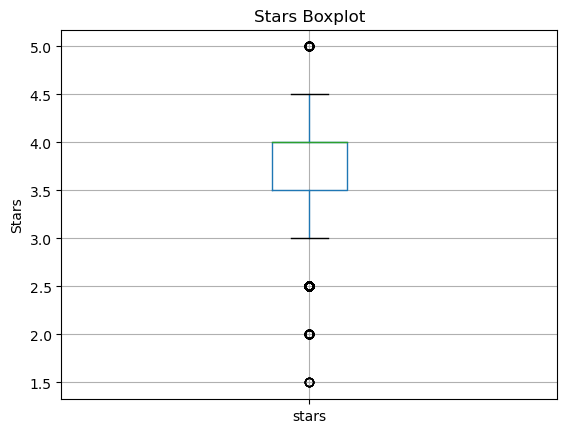

In [42]:
import matplotlib.pyplot as plt

#This is to visualize the distribution via a Boxplot
df_cleaned.boxplot(column='stars')
plt.title('Stars Boxplot')
plt.ylabel('Stars')
plt.show()


# Modeling

For my solution I will employ random forest regression to build a model which can be deployed in the tool to provide the stars of a prospective restaurant based on certain feature values. I am electing to utilize random forest regression as this is a technique that, being based in multiple decision trees, works quite well for using binary features to predict a continuous output. In addition, it is an effective method for high dimensional data with thousands of instances. Essenitally I opted for Random forest regression as this is based in the algorithm for random forests which classifies instances based on te=he consensus determination of the multiple decision trees via splits done on bootstrapped sample of the dataset. Since I am utilizing thse binary features for predicting a continuous variable, random forest regression essentially acts upon this same procedure except, since the prediction is continous, it computes the average target value prediciton form all the trees in the forest. This effectivley make sit quite viable in the cntext of using one hot encoded categorical data to predict a continuoius vakue as the basis of the algorithm is originated in handleing such input data with the specific regression component suited for continuous atrget variable as per the stars in this context. In a statement of brevity, Random Forest Regression is well configured for the specifics of the input features and target values in this context. 









In [47]:
#This, similar to prior, seperates the final bianry df into the input features and the target variable for the training and testing
x = []
y = []
for i in df_to_Model:
    if i != 'Stars':
        x.append(i)
    else:
        y.append(i)
Features = df_to_Model[x]
Target = df_to_Model[y]

In [48]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

#Here I split the dataset into two randomly arranged train and test splits. Random state of 50 to esnure reproducability of the model
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.2, random_state=50)

#ravel is used to convert the y_train from a pandas 2d array to a 1d array needed for the random forest algorithim in scikit learn
Y_train = Y_train.values.ravel()

#This initiates the random forest regression function with the specified paramters of 150 trees and random state of 50 as per above
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=50)
rf_regressor.fit(X_train, Y_train)

#Use the trained model to predict based on the inouts from the test data
Y_pred = rf_regressor.predict(X_test)

# Evaluate said predictions against the actual values in y_test and compute MSE to assess performance.
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.23688119576519098



# Results



Overall, given that this model is predicting restaurant rating solely on supplemental attributes with no consideration for the food itself, arguably the most impactful component, the MSE of .24 given the 0-5 scale of stars is satisfiable. The preprocessing of this data into the necessary format was the most intensive section of the project as the Yelp data required substantial rearrangements and engineering to be suitable in this context. In an effort to apply this model in useful capacities, a visual is noted below showing the information gained as a product of each feature in the forest of decision trees. This can be interpreted as the importance of each feature in this context and is useful for individuals gauging which attributes are most impactful, in this case, outdoor seating. Following this, I apply the model to develop a user interactive tool that uptakes user input for each feature and computes a predicted star. This successfully solves the primary goal of this project which was to develop a tool that prospective restaurant owners could use to gauge how their potential attributes for their restaurants could materialize in star ratings. Lastly, I utilize folium to generate the geospatial map detailing the location and stars for each open restaurant with over 100 reviews from the Yelp dataset. 

**Importance for each Feature**

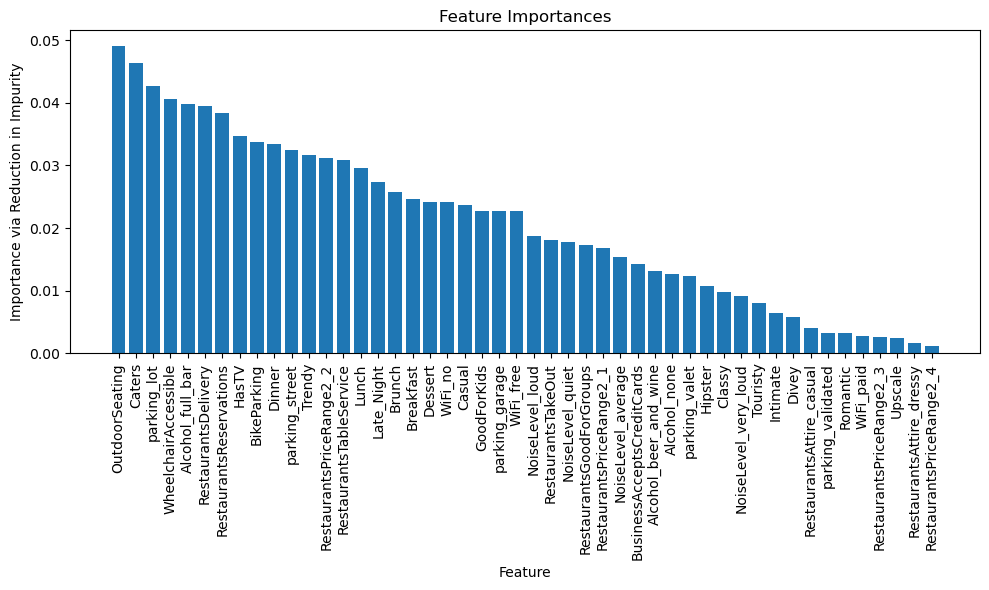

In [57]:
import matplotlib.pyplot as plt

#Here I employ a tool within scikit leanrs random forest regression capabilities which gathers the importance for each feature 
#in terms of impact in reducing the entropy as a product of splitting at this feature when avergaing this value across all the trees
importances = rf_regressor.feature_importances_

#This extracts the names of all the input features from the df
feature_names = Features.columns

#Here I apply the argsort functipn which essentially associates indices to each importance and subsequently applies a sort via
#descending magnitude while the indicies correspondonding to the values in alignment with this order. 
indices = importances.argsort()[::-1]

#This plot the feature importances from largest to smallest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(Features.shape[1]), importances[indices], align="center")
plt.xticks(range(Features.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance via Reduction in Impurity")
plt.tight_layout()
plt.show()


**Tool for Prospective Restaurant Owners**

For this, I iterate through the features and prompt the user to enter binary values for each attribute's presence or lack of in their hypothetical restaurant. I incorporate error handling to ensure these values are binary and conditions to handle the restaurant price range features so the user understands what is meant by the four separate features. The example I detailed below is for a potential owner of a hypothetical casual restaurant.

In [58]:
#This houses the logic for the user interactive tool
Rest_Name = input("Enter the Name of your restaurant")
User_dict = {}

#Below iterates through the features and prompts the user for a binary value for a yes or no to its presence
#These are assigned to a dictionary for key value pairs for each feature and value as provided by the user
for i in Features:
    while True:
        try:
            while True:
                if i == 'RestaurantsPriceRange2_1':
                    User = int(input(f"If you would rate the price a 1 on a scale of 1-4, enter 1. If not enter 0."))
                    break
                if i == 'RestaurantsPriceRange2_2':
                    User = int(input(f"If you would rate the price a 2 on a scale of 1-4, enter 1. If not enter 0."))
                    break
                if i == 'RestaurantsPriceRange2_3':
                    User = int(input(f"If you would rate the price a 3 on a scale of 1-4, enter 1. If not enter 0."))
                    break
                if i == 'RestaurantsPriceRange2_4':
                    User = int(input(f"If you would rate the price a 4 on a scale of 1-4, enter 1. If not enter 0."))
                    break
                User = int(input(f"Enter a 0 for the lack of or a 1 to indicate the presence of {i}"))
                break
            if User != 0:
                if User != 1:
                    raise ValueError
            break
        except ValueError:
            print(f"Please enter a binary value of 0 or 1 for {i}")
    User_dict[i] = User


#This creates a df of the user data
df_User = pd.DataFrame(User_dict, index = ['User_Data'])

#Predict using the trained model above to get a stars value from user input
Y_pred_user = rf_regressor.predict(df_User)

for i in Y_pred_user:
    print(f'Based on the provided features, {Rest_Name} is predicted to earn {i} stars out of 5')

Enter the Name of your restaurantDan's Burgers
Enter a 0 for the lack of or a 1 to indicate the presence of BikeParking1
Enter a 0 for the lack of or a 1 to indicate the presence of BusinessAcceptsCreditCards1
Enter a 0 for the lack of or a 1 to indicate the presence of GoodForKids1
Enter a 0 for the lack of or a 1 to indicate the presence of HasTV1
Enter a 0 for the lack of or a 1 to indicate the presence of OutdoorSeating1
Enter a 0 for the lack of or a 1 to indicate the presence of RestaurantsDelivery1
Enter a 0 for the lack of or a 1 to indicate the presence of RestaurantsGoodForGroups1
Enter a 0 for the lack of or a 1 to indicate the presence of RestaurantsReservations0
Enter a 0 for the lack of or a 1 to indicate the presence of RestaurantsTakeOut1
Enter a 0 for the lack of or a 1 to indicate the presence of Caters1
Enter a 0 for the lack of or a 1 to indicate the presence of RestaurantsTableService0
Enter a 0 for the lack of or a 1 to indicate the presence of WheelchairAccessibl

**Geospatial Visualization**

This code utilizes folium to create a map detailing the restaurants used in the modeling alongside the user's restaurant based on their input coordinates. Each restaurant is portrayed at its precise location along with its name and stars when clicked on. The map can be zoomed in and out to depict each restaurant's location. In the example, I show the hypothetical restaurant from above, Dan's Burgers with its 3.73 predicted stars in Texas which I chose as a random location for visual aesthetics. 

In [68]:
import folium
from folium.plugins import MarkerCluster

#Extract the latitude and longitude features from the cleaned df, prior to the streamlining for the modeling specifically
latitude = df_cleaned['latitude']
longitude = df_cleaned['longitude']

#Define the map center as the average coordinate points and intiialize the map at a zoom which shows enough wihout being too far out
map_center = [latitude.mean(), longitude.mean()] 
map1 = folium.Map(location=map_center, zoom_start=3)

#This initializes the clusters which group similarly located restaurants toegther with respect to the current zoom for computational efficiency
cluster = MarkerCluster().add_to(map1)

#Iterate through each restaurant used by the model and create a point on the map at its coordinates with a popup of the name and stars
b_names = df_cleaned['name']
stars = df_cleaned['stars']
for name, lat, long, s in zip(b_names, latitude, longitude, stars):
    pop = f"{name}, {s} stars"
    folium.Marker(location=[lat, long], popup=pop).add_to(cluster)
    
#This captures user input for coordinates of their restaurant so it too can be visualized with the name provided above and stars as predicted 
User_pop = f"{Rest_Name}, {Y_pred_user} stars"
while True:
    try:
        User_lat = input("Enter the latitude for you business or a hypothetical one")    
        User_long = input("Enter the longitude for you business or a hypothetical one")
        folium.Marker(location = [User_lat, User_long], popup=User_pop).add_to(cluster)
    except ValueError:
        print('Please enter latitude and longitude purely as valid numerical values for these coordinates')
    else:
        break
map1


Enter the latitude for you business or a hypothetical one29.749907
Enter the longitude for you business or a hypothetical one-95.358421


In sum, the executed solution was effectively able to solve the proposed Data Science problem, resulting in revealing insight into the nature of the Yelp data alongside the creation of a model that could be deployed in many manners, as per the tools above.